<a href="https://colab.research.google.com/github/kwpark23/Airline-Delays/blob/main/Airline_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Introduction

In the past summer, extreme traveller volumes and under-prepared by airlines and airport caused one of worst travelling experience in recent years. Hundreds of flights were cancelled that left thousands of travellers stranded in the airport. Toronto Pearson airport was ranked the worst airport in North America for flight dalays and cancellations (source: https://www.cnn.com/travel/article/worst-airports-delays-cancellations-summer-2022/index.html). Airlines like Air Canada lost millions of dollars for having to reschedule flights or rebook flights altogether for customers (source: https://www.theglobeandmail.com/business/article-air-canada-earnings-second-quarter-results/). Customers also lost a lot of money for having their plan derailed. 

If we are to avoid this type of problem in the future, what can we do? We can use the predictive power of machine learning algorithms to help predict whether a flight would be delayed. We can use the past data of flights that have been delayed and not delayed to train our Machine Learning model. 

Airlines and airports can benefit from such Machine Learning model and schedule flights accordingly to avoid possible dalays in the future. Travellers won't have to worry whether their flight might get delayed or not.  


* **Dataset Used:** Airline delay dataset (https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay)
* **Description of the dataset:** Using Airline delay dataset (includes Air Canada) to determine if a flight is likely to be delayed (This problem affected a lot of Canadians this summer). 
* **Business Problem:** Using Machine Learning (Binary Classification), can airlines predict which flight is likely to be delayed, and therefore reroute schedules ahead to avoid bottlenecks at the airports? 

# 2.0 Basic Installation
### In this section, we install pycaret and the Kaggle dataset.  

We will show:

* **Setting Up Modules:** How to install pycaret, kaggle and other required modules
* **Getting Data:**  How to import data from Kaggle website directly




1. First we will be installing Pycaret for ML data processing. 

In [ ]:
!pip install pycaret

2. Next, we will be installing Kaggle module and make a separate directory called kaggle (if the directory already exists, *mkdir* command won't do anything). 

In [ ]:

! pip install kaggle

We need to create a directory inside ./root (current directory) called .kaggle

In [3]:
mkdir ~/.kaggle

### Important!! Following this instruction: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

### We need to download our API token to our desktop PC (or notebook). Then simply upload kaggle.jason to this notebook. 


In [4]:
cp kaggle.json ~/.kaggle/

3. To download kaggle dataset directly from Kaggle website, we need to have API Credential from the Kaggle account holder. I have used my API Credential for this project. I have already downloaded the credential and stored it inside /MyDrive/. 

Each time this Colab notebook runs, it will grab the credential from the directory, so we can fetch the dataset. 

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

4. Now, we are ready to fetch the dataset from the website and unzip it. 

In [ ]:
! kaggle datasets download jimschacko/airlines-dataset-to-predict-a-delay --force

In [ ]:
! unzip airlines-dataset-to-predict-a-delay.zip

### Note about the dataset: This dataset is from 2008, so some airlines have since been out of business or have been merged with other airlines

In [ ]:
! pip install pandas


# 3.0 Data Analysis

### In this section, we will port over the raw data and modify it and sample it for better fitting into our machine learning models.

We have done one thing:
1. Make the dataset smaller from 500,000 to 160,000 for faster training  

### Panda Profiling

### We are now going to use pandas profiling function to generate a profile report on our dataset for data visualization and analysis.

Based on Pandas analysis we can deduce following details about our dataset:

1. Dataset has no missing data or duplicate rows
2. Time column is the departure time measured in minutes from midnight 
3. Length column is the duration of the flight in minutes 
4. Flight and Length shows negative correlation
5. Time and Delay shows positive correlation (What we are interested in)
6. Airline and Length shows positive correlation


In [9]:
import pandas as pd
import pandas_profiling as pp 

In [17]:
rawdata = pd.read_csv('/content/Airlines.csv')
dataset = rawdata.sample(n=16143)

In [18]:
dataset.shape

(16143, 9)

In [19]:
profile = pp.ProfileReport(dataset) 
profile.to_file("output.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns; sns.set_theme()

Once the dataset has been read, check the shape of the dataset upsing Pycaret's *shape* command 

## Individual Feature Exploration




#### Airlines

There is 18 unique airline companies.


count      18.000000
mean      896.833333
std       659.617113
min       172.000000
25%       452.250000
50%       721.000000
75%      1053.000000
max      2831.000000
Name: id, dtype: float64

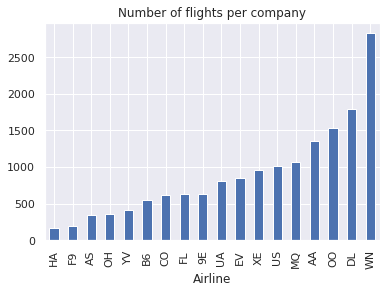

In [22]:
#how many unique values in 'Airline': 18
Airlines = dataset.groupby('Airline')['id'].nunique()
Airlines_count = Airlines.count()
Airlines = Airlines.sort_values()

print("There is " + Airlines_count.astype(str) +  " unique airline companies.")

ax_c = Airlines.plot.bar()
ax_c.set_title('Number of flights per company')

Airlines.describe()

Text(0, 0.5, '%')

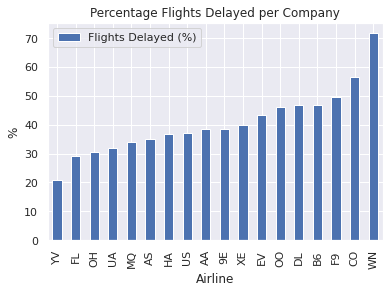

In [23]:
df_a = dataset
df_a_delay = Airlines = dataset.groupby('Airline')['Delay'].mean()
df_a_delay = df_a_delay.reset_index()
df_a_delay['Flights Delayed (%)'] = (df_a_delay['Delay'] *100).round(2)
df_a_delay = df_a_delay.sort_values('Delay')
df_a_delay = df_a_delay.drop(columns= 'Delay')

df_a_delay.plot(kind = 'bar', x = 'Airline', title="Percentage Flights Delayed per Company")
plt.ylabel("%")

### As we can see from Airlines analysis, Southwest Airline (WN) has the highest number of flights, as well as highest percentage of flight delays.

#### Time (of departure in minutes)

Text(0.5, 1.0, 'Flights per Hour of Day')

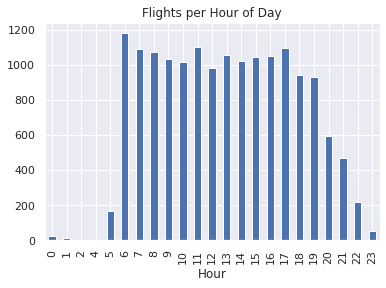

In [24]:
df_time = dataset
df_time['Hour_full'] = df_time['Time']/60
df_time['Hour'] = df_time['Hour_full'].astype(int)
df_time['Minutes'] = (df_time['Hour_full'] - (df_time['Hour'] ) )*60

HourOfDay = df_time.groupby('Hour')['id'].nunique()
HourOfDay.describe()

HourDay = dataset.groupby('Hour')['id'].nunique()

ax_h = HourDay.plot.bar()
ax_h.set_title('Flights per Hour of Day')

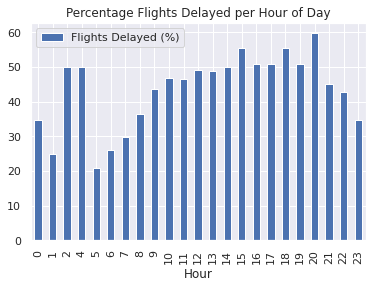

In [25]:
df_time1 = dataset
df_time1['Hour_full'] = df_time1['Time']/60
df_time1['Hour'] = df_time1['Hour_full'].astype(int)


df_h_delay = Airlines = df_time1.groupby('Hour')['Delay'].mean()
df_h_delay = df_h_delay.reset_index()

df_h_delay['Flights Delayed (%)'] = (df_h_delay['Delay'] *100).round(2)
df_h_delay = df_h_delay.drop(columns= 'Delay')
df_h_delay.plot.bar(x = 'Hour', title="Percentage Flights Delayed per Hour of Day" )

### Here, we can see that most flight leave between 6AM and 7PM (19th hour). Also most delays occur on all time slots except for between 5AM and 8AM. 

#### Length of the Flight

Text(0.5, 1.0, 'Delay Probability per Length of Flight (Hours)')

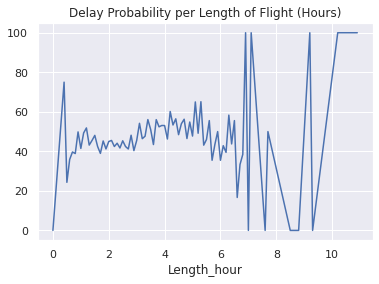

In [26]:
df_time_l = dataset
df_time_l['Length_hour'] = df_time_l['Length']/60
df_time_l['Length_hour'] = df_time_l['Length_hour'].round(1)

df_l_delay = df_time_l.groupby('Length_hour')['Delay'].mean()
df_l_delay = df_l_delay * 100
ax_l = df_l_delay.plot()
ax_l.set_title('Delay Probability per Length of Flight (Hours)')

In [27]:
#'Delay'
delay_pct = round(df_time['Delay'].sum()/df_time['Delay'].count() * 100 , 2)
delay_pct_w = delay_pct.astype(str)
print(delay_pct_w +  '% of flights is delayed')

45.61% of flights is delayed


### Here, we can see that for longer flights, it is more likely that delay will occur, with some flights over 10 hours of flight reaching 100% chance of delay. Overall, 45.61% of all flights were delayed in our dataset. Also, this shows that our dataset label is fairly balanced. 

#### Exploring data correlation

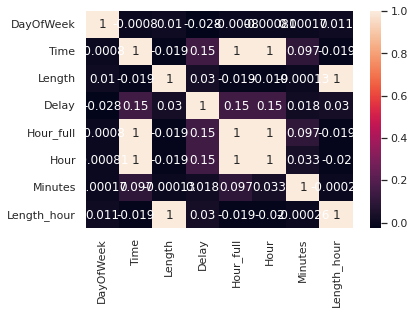

In [28]:
df_mat = dataset.drop(['id', 'Flight'], axis = 1)
corrMatrix = df_mat.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Here, we can see that for 'delay' column, correlation is highest with: time of day, length of the flight (not much), and Day Of Week (even less) 

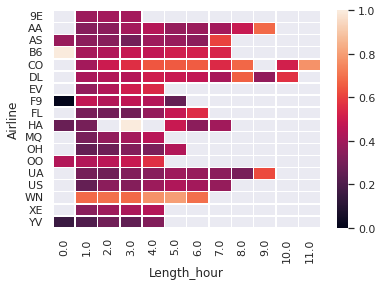

In [ ]:
df_time_l = dataset
df_time_l['Length_hour'] = df_time_l['Length']/60
df_time_l['Length_hour'] = df_time_l['Length_hour'].round(0)

table_l = pd.pivot_table(df_time_l, values = 'Delay',  index=['Airline'], columns=['Length_hour'], aggfunc=np.mean)
ax = sns.heatmap(table_l, linewidths=.5)

### Here, for airlines with longer flights, delay might be more likely. 

### Data split


### Now we have a working dataset for our ML training. Finally, make sure to set aside validation and test dataset to be used after ML training is done. 

In [29]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15336, 13)
Unseen Data For Predictions: (807, 13)


# 4.0 Setting up Environment in PyCaret

* **Setting Up our dataset pipeline:** We will be using `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

In [30]:
! pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from pycaret.classification import *

1. We are going to set up our ML environment and customize it by pre-processing pipeline using different parameteres.  

In [32]:
exp_clf101 = setup(data = data, target = 'Delay', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  log_experiment = False, experiment_name = 'airlinedelays', use_gpu=True) 

Description            Value
0                               session_id              123
1                                   Target            Delay
2                              Target Type           Binary
3                            Label Encoded             None
4                            Original Data      (15336, 13)
5                           Missing Values            False
6                         Numeric Features                8
7                     Categorical Features                4
8                         Ordinal Features            False
9                High Cardinality Features            False
10                 High Cardinality Method             None
11                   Transformed Train Set     (10735, 274)
12                    Transformed Test Set      (4601, 274)
13                      Shuffle Train-Test             True
14                     Stratify Train-Test            False
15                          Fold Generator  StratifiedKFold
16                             Fold Number               10
17                                CPU Jobs               -1
18                                 Use GPU             True
19                          Log Experiment            False
20                         Experiment Name    airlinedelays
21                                     USI             f949
22                         Imputation Type           simple
23          Iterative Imputation Iteration             None
24                         Numeric Imputer             mean
25      Iterative Imputation Numeric Model             None
26                     Categorical Imputer         constant
27  Iterative Imputation Categorical Model             None
28           Unknown Categoricals Handling   least_frequent
29                               Normalize             True
30                        Normalize Method           zscore
31                          Transformation             True
32                   Transformation Method      yeo-johnson
33                                     PCA            False
34                              PCA Method             None
35                          PCA Components             None
36                     Ignore Low Variance             True
37                     Combine Rare Levels            False
38                    Rare Level Threshold             None
39                         Numeric Binning            False
40                         Remove Outliers            False
41                      Outliers Threshold             None
42                Remove Multicollinearity             True
43             Multicollinearity Threshold             0.95
44             Remove Perfect Collinearity             True
45                              Clustering            False
46                    Clustering Iteration             None
47                     Polynomial Features            False
48                       Polynomial Degree             None
49                    Trignometry Features            False
50                    Polynomial Threshold             None
51                          Group Features            False
52                       Feature Selection            False
53                Feature Selection Method          classic
54            Features Selection Threshold             None
55                     Feature Interaction            False
56                           Feature Ratio            False
57                   Interaction Threshold             None
58                           Fix Imbalance            False
59                    Fix Imbalance Method            SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Delay',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='Delay')),
                ('fix_perfect', Remove_100(target='Delay')),
                ('clean_names', Clean_Colum_Names()),
       

A few important things to note regarding the dataset:
- **Target Type :**  Target type for this dataset is binary (1 or 0)<br/>
<br/>
- **Original Data :**  Displays the original shape of the dataset. In this experiment (512414, 9) means 512414 samples and 9 features including the target column. <br/>
<br/>


# 5.0 Comparing All Models

Candidates for our model are as follows:

1. Random Forest ('rf')
Pro: robust to outliers, works well with non-linear data, lower risk of overfitting, runs well with large dataset, better accuracy than other classification algorithms
Con: found to be biased with dealing with categorical variables, slow training

2. Logistic regression ('lr')
Pro:fast at clasifying unkown records, good accuracy for many simple data sets
Con: assumes linearity between dependent variables and independent variables, non-linear problems can't be solved with logistic regression, Neural Network can outperform this algorithm

3. Linear Discriminant Analysis ('lda')
Pro: Could be better alternative to logistic regression, simple and fast
Con: requires normal distribution assumption on features

4. Ada Boost Classifier ('ada')
Pro: requires less parameter tweaking than SVM, no overfitting, improved accuracy
Con: sensitive to noises

### We ran compare_models() on Ada Boost and LDA only because of limitation of RAM for Colab. 

In [35]:
best_model = compare_models(include = ['rf','lr', 'ada', 'lda'], fold=5)

Model  Accuracy     AUC  Recall   Prec.      F1  \
rf       Random Forest Classifier    0.6492  0.7009  0.5288  0.6425  0.5800   
lda  Linear Discriminant Analysis    0.6490  0.6970  0.5450  0.6366  0.5872   
lr            Logistic Regression    0.6485  0.6986  0.5448  0.6359  0.5868   
ada          Ada Boost Classifier    0.6479  0.7048  0.5576  0.6310  0.5919   

      Kappa     MCC  TT (Sec)  
rf   0.2837  0.2877     3.048  
lda  0.2851  0.2877     0.452  
lr   0.2842  0.2868     0.432  
ada  0.2844  0.2861     0.842

INFO:logs:create_model_container: 8
INFO:logs:master_model_container: 8
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [36]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


### We deliberately reduced number of folds to avoid RAM crash issues. Also, based on our experiment, simply increasing the fold to the maximum number does not improve model's accuracy. Here, we can see that the best model with highest accuracy is Random Forest Classifier.

# 6.0 Ensembling Models
Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. We are going to try a number of different techniques to find the model with highest accuracy. 

### Bagging and boosting
Bagging is used with decision trees, where it significantly raises the stability of models in improving accuracy and reducing variance, which eliminates the challenge of overfitting.

Boosting combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially — that is, each model tries to compensate for the weaknesses of its predecessor. With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule. 

To use Ensembling, we need to use models like decision trees that can benefit from bagging and boosting. 

In [38]:
dt = create_model('dt', fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.5743  0.5710  0.5315  0.5359  0.5337  0.1421  0.1421
1       0.5906  0.5878  0.5549  0.5532  0.5540  0.1756  0.1756
2       0.5859  0.5824  0.5407  0.5490  0.5448  0.1651  0.1651
3       0.6022  0.5998  0.5711  0.5654  0.5683  0.1995  0.1995
4       0.5794  0.5757  0.5310  0.5415  0.5362  0.1515  0.1516
Mean    0.5865  0.5834  0.5458  0.5490  0.5474  0.1668  0.1668
Std     0.0096  0.0100  0.0153  0.0102  0.0126  0.0200  0.0200

INFO:logs:create_model_container: 10
INFO:logs:master_model_container: 10
INFO:logs:display_container: 5
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [40]:
bagged_dt = ensemble_model(dt, n_estimators=10, fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6283  0.6579  0.4837  0.6214  0.5440  0.2385  0.2438
1       0.6260  0.6667  0.4705  0.6215  0.5356  0.2324  0.2387
2       0.6274  0.6753  0.4766  0.6220  0.5397  0.2358  0.2417
3       0.6325  0.6764  0.4878  0.6275  0.5489  0.2470  0.2526
4       0.6223  0.6597  0.4720  0.6138  0.5336  0.2252  0.2307
Mean    0.6273  0.6672  0.4781  0.6212  0.5404  0.2358  0.2415
Std     0.0033  0.0076  0.0067  0.0044  0.0056  0.0072  0.0071

INFO:logs:create_model_container: 12
INFO:logs:master_model_container: 12
INFO:logs:display_container: 7
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [41]:
boosted_dt = ensemble_model(dt, method = 'Boosting', fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.5776  0.5736  0.5264  0.5401  0.5332  0.1475  0.1476
1       0.5845  0.5818  0.5488  0.5466  0.5477  0.1635  0.1635
2       0.5901  0.5868  0.5467  0.5535  0.5501  0.1737  0.1737
3       0.6036  0.6005  0.5630  0.5682  0.5656  0.2012  0.2012
4       0.5845  0.5805  0.5331  0.5475  0.5402  0.1614  0.1614
Mean    0.5881  0.5846  0.5436  0.5512  0.5474  0.1695  0.1695
Std     0.0087  0.0090  0.0128  0.0095  0.0109  0.0179  0.0179

INFO:logs:create_model_container: 13
INFO:logs:master_model_container: 13
INFO:logs:display_container: 8
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fracti

### Between bagging and boosting, it seems that 'bagging' produces better accuracy. Based on comparision between all ensembled models, Random Forest Classifier has the highest accuracy, so we will plot our model with Random Forest Classifier. 

# 7.0 Plotting Models

* **ROC Curve:**
what it is: Receiver Operating Characterstic curve show True Positive Rate (Recall) and False Positive rate

* **AUC:**
what it is: Area under ROC Curve measures 2D area underneath ROC curve from (0,0) to (1,1). AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

* **Precision Recall Curve:**
what it is:The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

* **Feature Importance Plot:**
what it is: provides a list of the most significant variables in descending order

* **Confusion matrix:**
what it is: is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.Confusion matrices are useful because they give direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.

In [43]:
rf = create_model('rf', fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6414  0.6932  0.5315  0.6286  0.5760  0.2690  0.2719
1       0.6456  0.6994  0.5173  0.6403  0.5722  0.2754  0.2800
2       0.6628  0.7131  0.5325  0.6650  0.5914  0.3103  0.3158
3       0.6549  0.7084  0.5539  0.6434  0.5953  0.2974  0.2999
4       0.6414  0.6903  0.5086  0.6353  0.5650  0.2662  0.2710
Mean    0.6492  0.7009  0.5288  0.6425  0.5800  0.2837  0.2877
Std     0.0084  0.0087  0.0154  0.0123  0.0115  0.0172  0.0175

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [44]:
tuned_rf = tune_model(rf, fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6297  0.6799  0.5864  0.5979  0.5921  0.2531  0.2532
1       0.6367  0.6935  0.5874  0.6071  0.5971  0.2665  0.2666
2       0.6549  0.7066  0.5945  0.6311  0.6122  0.3018  0.3022
3       0.6544  0.7048  0.6006  0.6287  0.6143  0.3016  0.3018
4       0.6474  0.6868  0.5666  0.6273  0.5954  0.2844  0.2856
Mean    0.6446  0.6943  0.5871  0.6184  0.6022  0.2815  0.2819
Std     0.0099  0.0103  0.0115  0.0134  0.0092  0.0192  0.0194

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


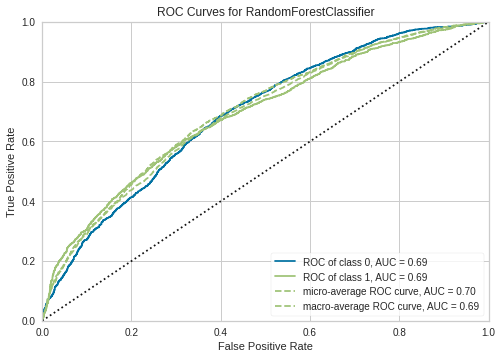

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [47]:
plot_model(tuned_rf, plot = 'auc')

* **AUC Analysis:** AUC is 0.69 and the ROC curve falls closer to True Positive rate, which shows it has a fairly good accuracy of prediction.

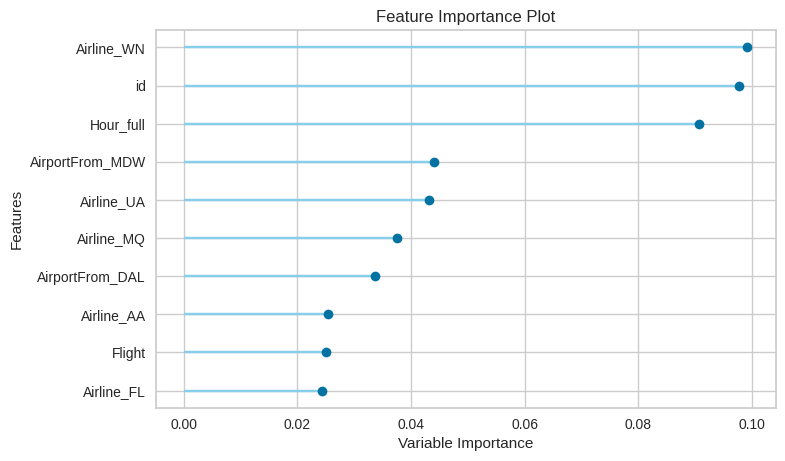

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [52]:
plot_model(tuned_rf, plot ='feature')

* **Feature Analysis:**  Based on the Feature Importance plot, WN (South West) Airline and Hour are two relevant features that seem to affect our model the most (ID is ignored in this case). 

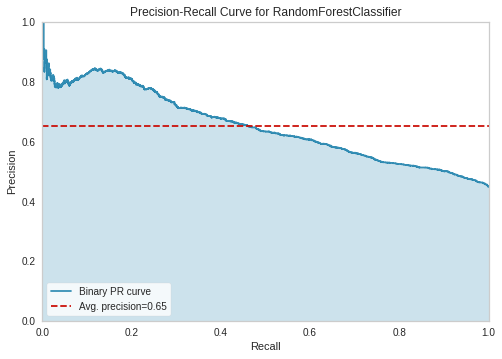

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [48]:
plot_model(tuned_rf, plot = 'pr')

* **Precision-Recall Analysis:** Average Precision is 0.65, which is also fairly good. 


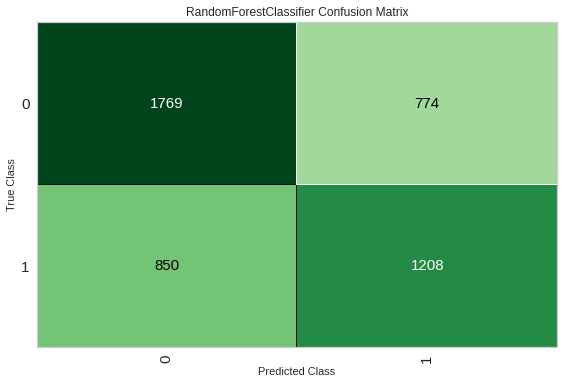

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [53]:
plot_model(tuned_rf, plot='confusion_matrix')

* **Confusion Matrix Analysis:** We can see that our model has fairly good prediciton for true positives and true negative classes, but also has a large set of false positives and false negatives. 

### Our model unfortunately has a large number of false negative, which means it predicted that a flight will not be delay, when in fact, it has been delayed. 

# Evaluating Our Model

Now we have our final model, we will try unseen dataset on our model and evaluate its prediction accuracy.

In [54]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [55]:
predict_model(tuned_rf)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.     F1   Kappa  \
0  Random Forest Classifier     0.647  0.6923   0.587  0.6095  0.598  0.2836   

      MCC  
0  0.2838

id    Flight  Hour_full   Minutes  Length_hour  Airline_9E  \
0     1.244804 -1.462808   0.388400 -0.995777     0.497732         0.0   
1     1.617038 -0.015386   0.498360  0.757695     1.261446         0.0   
2     1.643112  1.472116   1.209921 -1.342399    -0.559167         0.0   
3     0.637745 -0.156241  -1.012683  1.034220     1.051123         0.0   
4     0.745331 -0.611225  -1.405781 -1.516309     1.160267         0.0   
...        ...       ...        ...       ...          ...         ...   
4596  0.457316  1.759941   0.710105  0.757695     1.051123         0.0   
4597 -0.345362 -1.006918   0.671385  0.144060     0.580788         0.0   
4598  1.529232 -1.462808   1.476694 -0.365298    -1.217593         0.0   
4599 -0.232588 -1.128013   0.674907  0.200208     1.261446         0.0   
4600  1.538378 -1.456873   2.180497  1.034220     2.062420         0.0   

      Airline_AA  Airline_AS  Airline_B6  Airline_CO  ...  DayOfWeek_1  \
0            0.0         0.0         0.0         0.0  ...          1.0   
1            1.0         0.0         0.0         0.0  ...          0.0   
2            0.0         0.0         0.0         0.0  ...          0.0   
3            1.0         0.0         0.0         0.0  ...          0.0   
4            0.0         0.0         1.0         0.0  ...          0.0   
...          ...         ...         ...         ...  ...          ...   
4596         0.0         0.0         0.0         0.0  ...          1.0   
4597         0.0         0.0         1.0         0.0  ...          1.0   
4598         0.0         0.0         0.0         0.0  ...          0.0   
4599         0.0         0.0         1.0         0.0  ...          0.0   
4600         0.0         0.0         0.0         0.0  ...          0.0   

      DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  DayOfWeek_6  \
0             0.0          0.0          0.0          0.0          0.0   
1             0.0          0.0          1.0          0.0          0.0   
2             0.0          0.0          1.0          0.0          0.0   
3             0.0          1.0          0.0          0.0          0.0   
4             0.0          0.0          1.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
4596          0.0          0.0          0.0          0.0          0.0   
4597          0.0          0.0          0.0          0.0          0.0   
4598          0.0          1.0          0.0          0.0          0.0   
4599          1.0          0.0          0.0          0.0          0.0   
4600          0.0          1.0          0.0          0.0          0.0   

      DayOfWeek_7  Delay  Label   Score  
0             0.0      0      0  0.5141  
1             0.0      0      0  0.5028  
2             0.0      1      1  0.5051  
3             0.0      0      0  0.5125  
4             0.0      0      0  0.5176  
...           ...    ...    ...     ...  
4596          0.0      0      0  0.5102  
4597          0.0      1      1  0.5059  
4598          0.0      1      1  0.5098  
4599          0.0      0      1  0.5085  
4600          0.0      0      1  0.5062  

[4601 rows x 277 columns]

### Our Random Forest Classifier has the accuracy of 0.647, but has a good AUC rate of 0.6923. 

In [56]:
final_tuned_rf = finalize_model(tuned_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
             

In [57]:
print(final_tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [58]:
unseen_predictions = predict_model(final_tuned_rf, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.6097  0.6678   0.557  0.5989  0.5772  0.2156   

      MCC  
0  0.2161

id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
0  201058      OO    4526         DEN       SLC          7  1040      90   
1  411669      9E    4034         DTW       CMH          5   830      64   
2  100229      MQ    4247         BUF       ORD          1  1115     125   
3   38043      WN    2980         OAK       PHX          5   455     110   
4  381065      DL      47         ATL       BOS          3  1140     155   

   Delay  Hour_full  Hour  Minutes  Length_hour  Label   Score  
0      0  17.333333    17     20.0          1.5      1  0.5055  
1      1  13.833333    13     50.0          1.1      1  0.5010  
2      1  18.583333    18     35.0          2.1      0  0.5282  
3      0   7.583333     7     35.0          1.8      1  0.5272  
4      1  19.000000    19      0.0          2.6      1  0.5105

In [59]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Delay'], unseen_predictions['Label'], metric = 'Accuracy')

0.6097

## Here, we can see that our model has the accuracy rate of 0.6097 on unseen dataset. 

In [60]:
save_model(final_tuned_rf,'Final RF Model 11Oct2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), model_name=Final RF Model 11Oct2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
               

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Delay',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=4,
                                         max_featur

# Conclusion

We learned a great deal about entire pipeline of Machine Learning process. From framing a business problem to testing a new dataset to our ML model, through trial and error, we found out how to optimize our Model through data preprocessing, parameter tuning and changing the number of sample size. 

We also learned the limitation of Colab software, as it kept crashing when we used the dataset with 500 000 samples. By reducing the number of samples, we also reduced the accuracy of our model, but the performance on Colab was much more stable. 

Our model has the limited accuracy of 60% and this can be attributed to a number of factors such as:
1. not enough features
2. not enough data samples
3. Inadequate model for predicting our dataset
4. High number of outlier values
5. Inadequate feature engineering
6. Inadequate algorithm tuning

To improve our accuracy in the future, we could select a more up-to-date dataset with sufficient features, which would allow us to better apply feature engineering. Inaddition, we can experiment with more models and different ensembling methods to find the model that gives us the best accuracy for our dataset. 

## What we learned from Assignment 1:
* **How to frame a machine learning business problem**
* **How to analyze and preprocess dataset**
* **Explore each feature and try to deduce the impact it might have on the prediction**
* **How to select best ML models for our dataset**
* **How to interpret plots produced by our ML model**
* **How to experiment with different parameter values that gives us the highest accuracy**
* **How to create web app that utilizes our final ML model**
* **How to work collectively as a team**

## What can be improved for Assignment 2:
* **Experiment with more models and higher fold values to maximize accuracy and prediction correction rate.**
* **Choose a quality dataset that is more up-to-date**
* **Find out the best number of samples that gives us the highest accuracy for our model**
* **Try a different dataset that has higher correlation between features**